Mejores parámetros:  {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5}


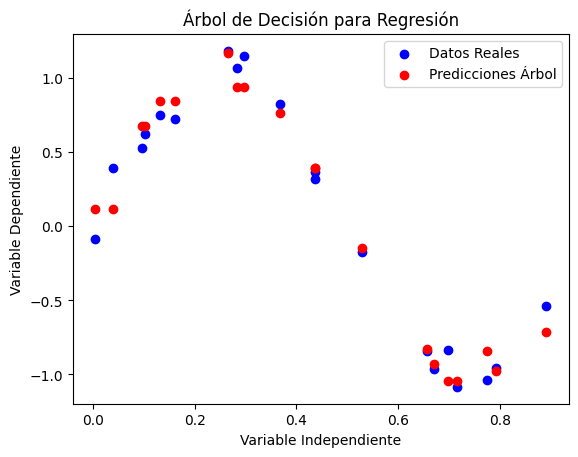

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Datos de ejemplo
np.random.seed(0)
X = np.sort(np.random.rand(100, 1), axis=0)
y = np.sin(2 * np.pi * X).ravel() + np.random.randn(100) * 0.1

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión para regresión
tree_reg = DecisionTreeRegressor()

# Definir los rangos de los parámetros para GridSearchCV
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=tree_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mejor combinación de parámetros
best_params = grid_search.best_params_
print("Mejores parámetros: ", best_params)

# Crear y ajustar el modelo con los mejores parámetros
tree_reg_best = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                                      min_samples_split=best_params['min_samples_split'],
                                      min_samples_leaf=best_params['min_samples_leaf'])
tree_reg_best.fit(X_train, y_train)

# Predicciones con el modelo ajustado
y_pred = tree_reg_best.predict(X_test)

# Gráfico de resultados
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.scatter(X_test, y_pred, color='red', label='Predicciones Árbol')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.title('Árbol de Decisión para Regresión')
plt.legend()
plt.show()

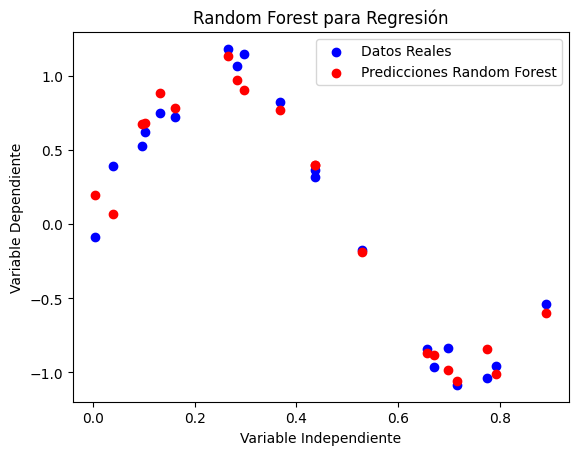

In [3]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de Random Forest para regresión
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
rf_reg.fit(X_train, y_train)

# Predicciones con el modelo ajustado
y_pred_rf = rf_reg.predict(X_test)

# Gráfico de resultados
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.scatter(X_test, y_pred_rf, color='red', label='Predicciones Random Forest')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.title('Random Forest para Regresión')
plt.legend()
plt.show()

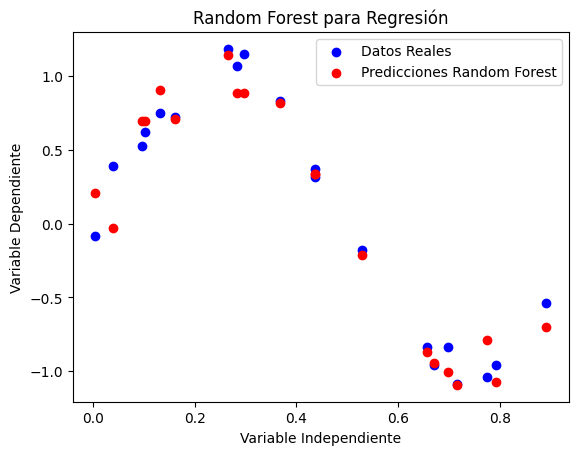

In [5]:
from sklearn.tree import DecisionTreeRegressor

# Crear un árbol de decisión para regresión
regressor = DecisionTreeRegressor(
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0
)

# Entrenar el modelo con datos de ejemplo
regressor.fit(X_train, y_train)

# Realizar predicciones
predictions = regressor.predict(X_test)

# Gráfico de resultados
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.scatter(X_test, predictions, color='red', label='Predicciones Random Forest')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.title('Random Forest para Regresión')
plt.legend()
plt.show()